##Week 1

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

1.Read and display the image.


• Read the image using the Pillow library and display it.

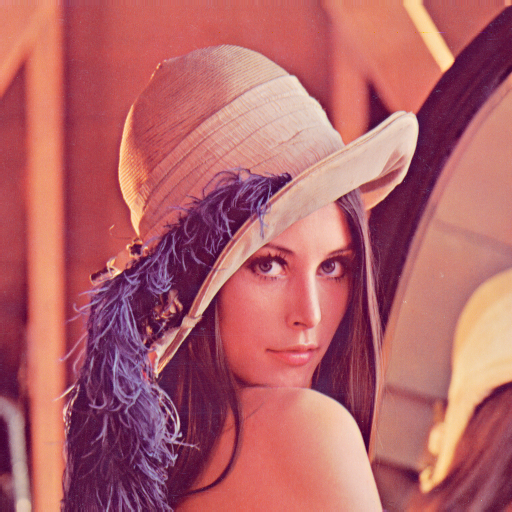

In [3]:
# display image in colab
image_colored = Image . open ("/content/drive/MyDrive/Images/Lenna_(test_image).png")
display ( image_colored )
image_array = np.array(image_colored)

2. Display only the top left corner of 100x100 pixels.

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

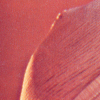

In [4]:
left, upper, right, lower = 100, 50, 200, 150
cropped_image = image_colored.crop((left,upper, right,lower))
display(cropped_image)

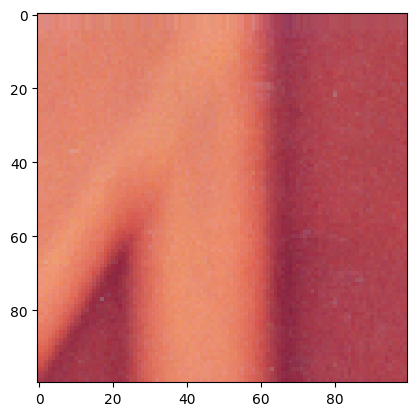

In [5]:
# Step 2: Extract the top-left 100x100 corner using array indexing
top_left_corner = image_array[:100, :100]

# Step 3: Display the extracted region using Matplotlib
plt.imshow(top_left_corner)

3. Show the three color channels (R, G, B).

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

 Shape of the image array : (512, 512, 3)


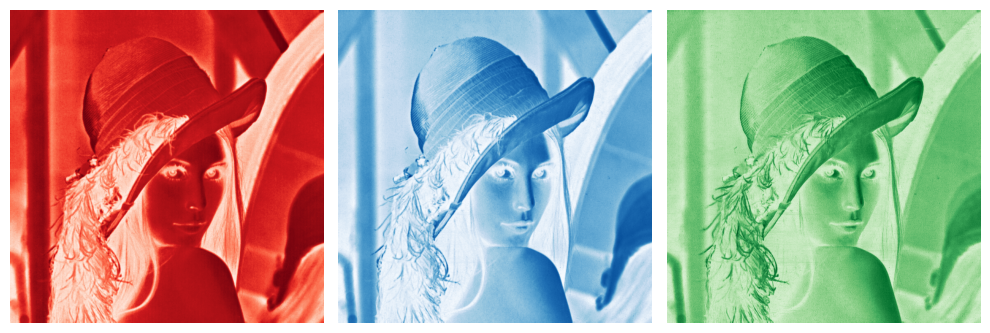

In [6]:
# Convert the Pillow image to a NumPy array
image_array_colored = np . array ( image_colored )
# Display the shape of the NumPy array (height , width ,channels )
print (" Shape of the image array :", image_array_colored . shape)
#For Red Channels
red_channel = image_array_colored [: , : , 0] # Red channel

green_channel = image_array_colored [: , : , 1] # Greenchannel

blue_channel = image_array_colored [: , : , 2] # Bluechannel

# Assuming image_colored is already defined and loaded above
 # Get the R, G, and B channels
r , g , b = image_colored . split ()
fig, axes = plt.subplots(1,3, figsize=(10,4))

axes[0].imshow(r, cmap='Reds')
axes[0].axis('off')

axes[1].imshow(g, cmap='Blues')
axes[1].axis('off')

axes[2].imshow(b, cmap='Greens')
axes[2].axis('off')

plt.tight_layout()
plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

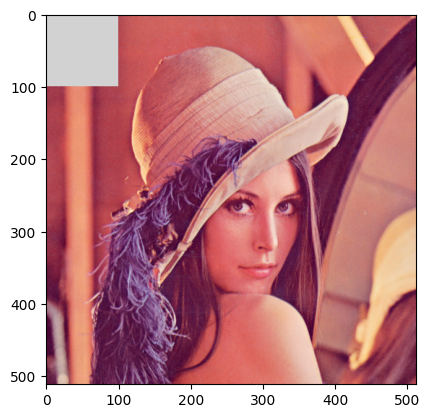

In [7]:
# Step 2: Extract the top-left 100x100 corner using array indexing
image_array[:100, :100] =[210,210,210]

plt.imshow(image_array)


# Exercise - 2:

1. Load and display a grayscale image.

• Load a grayscale image using the Pillow library.
• Display the grayscale image using matplotlib.

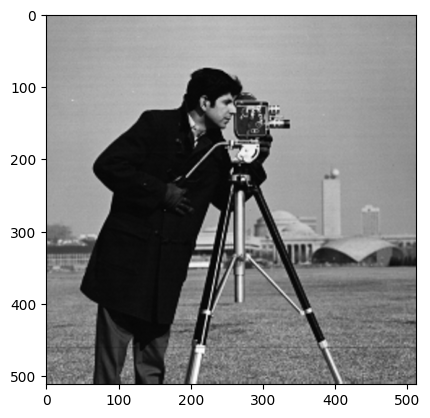

In [8]:
image = Image.open('/content/drive/MyDrive/Images/cameraman.png').convert('L')

image_array2= np.array(image)
plt.imshow(image, cmap="grey")
plt.show()

2. Extract and display the middle section of the image (150 pixels).

• Extract a 150 pixel section from the center of the image using NumPy array slicing.
• Display this cropped image using matplotlib.

Here to calculate 150 on each side of center pixel we first divide height and width by 2 which will give the mid line for both and then we add 75 on each side which will altogether becomes 150 on each sides of pixels


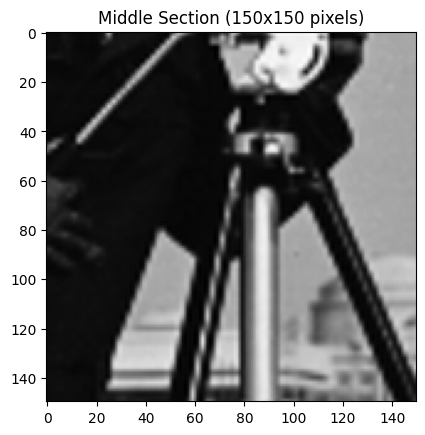

In [9]:
# Get the image dimensions
height, width = image_array2.shape

# Calculate the coordinates for the middle section
start_row = height // 2 - 75  # 75 pixels above the center
end_row = height // 2 + 75    # 75 pixels below the center
start_col = width // 2 - 75   # 75 pixels left of the center
end_col = width // 2 + 75     # 75 pixels right of the center

# Extract the middle section using array slicing
middle_section = image_array2[start_row:end_row, start_col:end_col]

# Display the cropped image using matplotlib
plt.imshow(middle_section, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.title('Middle Section (150x150 pixels)')

plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values
above 100 to 255 (creating a binary image).
• Display the resulting binary image.

We can use .where function to apply threshold

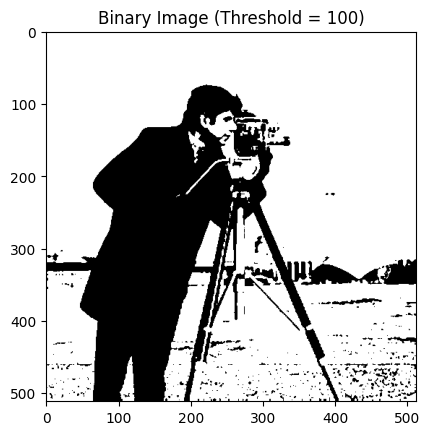

In [10]:
# Create a binary image using thresholding
binary_image = np.where(image_array2 < 100, 0, 255)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (Threshold = 100)')
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating
the image array.
• Display the rotated image using matplotlib.

We can use .rotate function directly to rotate any image

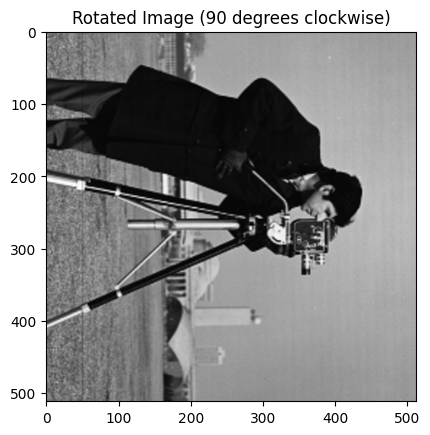

In [81]:
# Assuming 'image_colored' is the original image
rotated_image = image.rotate(270, expand=True)

# Display the rotated image
plt.imshow(rotated_image, cmap="grey")
plt.title('Rotated Image (90 degrees clockwise)')
plt.show()

Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated
across all three channels (R, G, and B).
• Display the converted RGB image using matplotlib.


Here we can simply use .convert method and pass RGB as argument inside the image will convert.

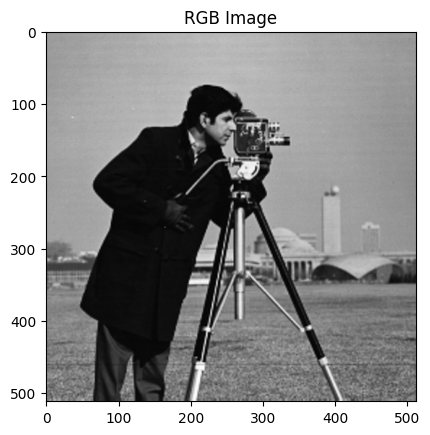

In [78]:
rgb_image = image.convert('RGB')


# Display the RGB image
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.show()

3 Image Compression and Decompression using PCA.

In this exercise, build a PCA from scratch using explained variance method for image compression task.
You are expected to compute the necessary matrices from the scratch. Dataset: Use image of your
choice.

1. Load and Prepare Data:

• Fetch an image of you choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data.

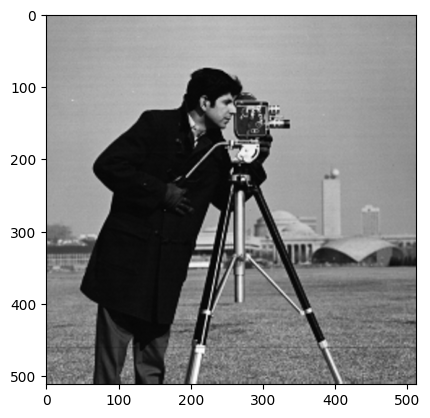

array([[543.51861775, 520.97947881, 492.56189228, ..., 452.37668175,
        465.56655914, 469.92323569],
       [520.97947881, 515.55188585, 504.98165744, ..., 438.16924535,
        451.13798771, 455.28722786],
       [492.56189228, 504.98165744, 514.61175621, ..., 415.396557  ,
        428.0037075 , 431.84547762],
       ...,
       [452.37668175, 438.16924535, 415.396557  , ..., 694.40484344,
        701.46153376, 705.1383317 ],
       [465.56655914, 451.13798771, 428.0037075 , ..., 701.46153376,
        724.80795927, 732.40163283],
       [469.92323569, 455.28722786, 431.84547762, ..., 705.1383317 ,
        732.40163283, 741.0831091 ]])

In [73]:
image = Image.open('/content/drive/MyDrive/Images/cameraman.png')

image_array2= np.array(image)
plt.imshow(image, cmap="grey")
plt.show()

# Get image dimensions
height , width = image_array2 . shape
 # Reshape the image into a 2D array where each rowrepresents a row of pixels
# This allows PCA to process each row as an observationand find patterns across pixel intensities
data = image_array2 . reshape ( height , width )


# Compute the mean of each column ( feature )
mean = np . mean ( data , axis =0)
std = np.std(data, axis=0)
# Subtract mean to center the data
centered_data = data - mean

# Compute covariance matrix
cov_matrix = np . cov ( centered_data , rowvar = False )

cov_matrix

We can see the image is grey scaled. I print it just for confirmation. Here we can see the covariance matrics in form of numoy array.

2. Eigen Decomposition and Identifying Principal Components:

• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to
the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

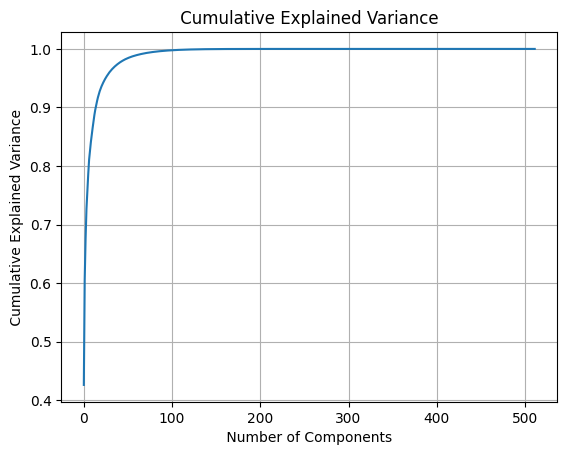

In [75]:
# Compute eigenvalues and eigenvectors
eigenvalues , eigenvectors = np . linalg . eigh ( cov_matrix )

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvalues = eigenvalues [ sorted_indices ]
eigenvectors = eigenvectors [: , sorted_indices ]

explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

We use np.linalg.eigh to compute the eigh value and vectors of the covariance matrix. eigh is preferred for symmetric matrices as its guarantess real rigenvalues. We sort the eigen values in descending order using np.argsort then rearrange the eigen vector accordingly. At last we explained variance ratio for each principal component (eigen value divided by sum of all eigen values). We then compute the sum of explained variance ratios using np.cumsum. Then we plot it at last


4.Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

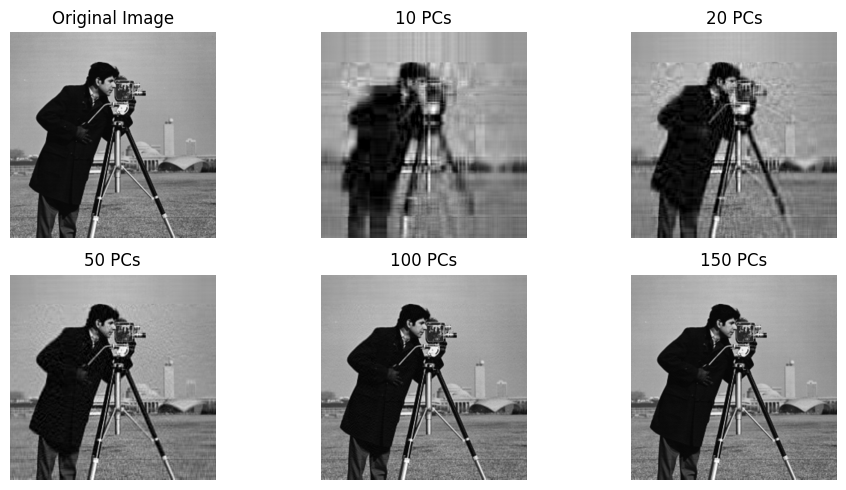

In [76]:
# List of different numbers of principal components to try
num_component_list = [10, 20, 50, 100, 150]

# Plot original image
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Experiment with different numbers of principal components
for i, num_components in enumerate(num_component_list):
    # Select top principal components
    top_eigenvectors = eigenvectors[:, :num_components]

    # Project data onto these components
    reduced_data = np.dot(centered_data, top_eigenvectors)

    # Reconstruct the image
    reconstructed_data = np.dot(reduced_data, top_eigenvectors.T) + mean
    reconstructed_image = np.clip(reconstructed_data, 0, 255)  # Ensure pixel values are in valid range

    # Display reconstructed image
    plt.subplot(2, 3, i+2)
    plt.imshow(reconstructed_image, cmap="gray")
    plt.title(f"{num_components} PCs")
    plt.axis("off")

plt.tight_layout()
plt.show()

The first image is the orginal grayscale image, showing all details. But reconstructed image depends upon the number of principal components used. With 10 PCs, image is very blurry and loose some detials. then at 20 pCs image is slightly sharp but still missing fine textures. With 50 pcs the image is more shaprper and almost look similar but not to the finest. The measure of finest increases later on and on 150 pcs the image is almost similar to orginal image slightly less to quality.